# AM120 HW07
## Zachary Miller

In [19]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, cdist, squareform
import matplotlib.pyplot as plt

### 1a

In [9]:
s1, s2 = 'dig725fof9hn', 'dsgf25gof9h'
x, y = np.array([3,-4,2]), np.array([32,-43,21])

We are given the above values and told to calculate the Edit, Jaccard, and Hamming distances between s1 and s2. The edit distance between s1 and s2 is given by the minimum number of character insertions and deletions to s1 in order for it to be equivient to s2. This requires the changing the second character from an 'i' to an 's' (changing a character requires two operations, deletion and inserion), then changing the fourth character from a '7' to a 'f', then changing the seventh character from an 'f' to a 'g', and finally deleting the last character. This totals to 7 insertions/deletions, so the edit distance between s1 and s2 is 7. The Jaccard distance between s1 and s2 is given by $d_j(s1,s2) = 1-J(s1,s2) = 1-J( \frac{|s1\cap s2|}{|s1\cup s2|})$, which is calculated below. Finally, the hamming distance between two ordered sets (in this case s1 and s2) is given by the number of differing components between them. Not that here we are only calculating the hamming distance between the the first 11 characters of s1 and s2, since hamming distance requires the ordered sets to be of the same length. The hamming distance is calculated below

In [10]:
# Use edits to make the strings the same
s1_edit = list(s1)
s1_edit[1] = 's'; s1_edit[3]='f'; s1_edit[6]='g' # six insertions/deletions
s1_edit = s1_edit[:-1] # one deletion
s1_edit = ''.join(s1_edit)
print("s1_edit equals s2:", s1_edit==s2)

# Calculate the Jaccard distance
s1_set, s2_set = set(s1), set(s2)
jac_dist = 1 - len(s1_set&s2_set)/len(s1_set|s2_set)
print('Jaccard distance:', jac_dist)

# Calculate the hamming distance
s1_ham = s1[:-1]
ham_dist = np.sum([s1_ham[i]==s2[i] for i in range(len(s1_ham))])
print('Hamming distance:', ham_dist)

s1_edit equals s2: True
Jaccard distance: 0.33333333333333337
Hamming distance: 8


### 1b

Now we are asked to calculate the the Cosine, Euclidean, Manhattan, and $L_\infty$ distances between x and y. The Cosine distance is given by $d_{cos}(x,y)=cos^{-1}(\sum_i x_iy_i)/\sqrt{\sum_i x_i^2 \sum_i y_i^2})$. The euclidean distance, also known as the $L_2$ norm, is given by $d_{euclidean}=\sqrt{\sum_i(x_i-y_i)^2}$. The Manhattan distance, also known as the L_1-norm, is given by $d_{manhattan}\sum_i|x_i-y_i|$. Finally, the $L_{\infty}$-norm is given by the limit of $(\sum_i|x_i-y_i|^r)^{1/r}$ as r appraoches infinity. As r grows towards infinity, the largest of the $|x_i-y_i|$ terms will dominate this equation, so we define the $L_\infty$-norm to be the largest of values of these terms. All of these values are calculated below.

In [11]:
# Calculate the Cosine distance
numer = np.sum([x[i]*y[i] for i in range(len(x))])
denom = np.sqrt(np.sum(np.square(x))*np.sum(np.square(y)))
cos_dist = np.arccos(numer/denom)
print('Cosine distance:', cos_dist)

# Calculate euclidean distance
euc_dist = np.sqrt(np.sum(np.square(x-y)))
print('Euclidean distance:', euc_dist)

# Calculate Manhattan distance
man_dist = np.sum(np.abs(x-y))
print('Manhatten distance:', man_dist)

# Calculate L_inf norm
linf_dist = np.max(np.abs(x-y))
print('L_infinity distance:', linf_dist)

Cosine distance: 0.007901415376634939
Euclidean distance: 52.182372502598994
Manhatten distance: 87
L_infinity distance: 39


### 1c
The definition of a circle is that each point on the circle is equidistant from the center of the circle, and that shared distance is the radius of the cricle. Though we normally use the euclidean distance as the distance metric, you could similarly use any other distance metric. Therefore, we can define a circle with radius $r$ in terms of the $L_n$ norm as the set of points such that the $L_n$ distance between each point and the center is $r$ for all points in the set. __plot circles below__

###  2a
We are asked to numerically examine the distribution of distances of random data as a function of dimension using the $L_1$ norm. Simulating below for 1000 uniform $(-1,1)$ element vectors in increasing dimension (based of Eli's code)...

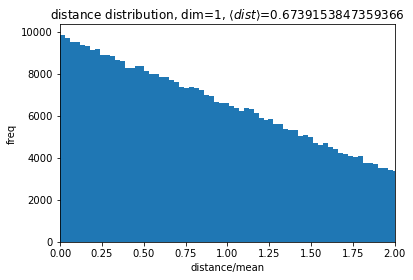

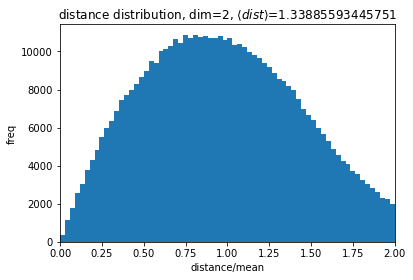

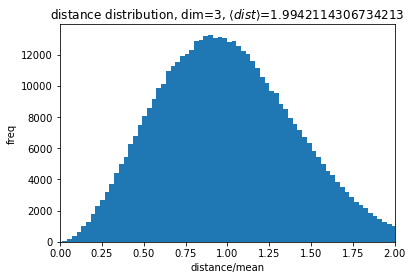

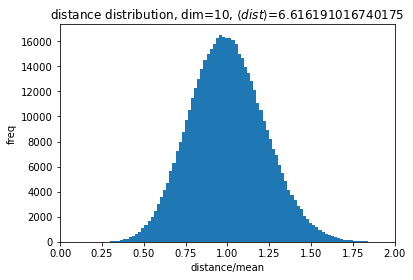

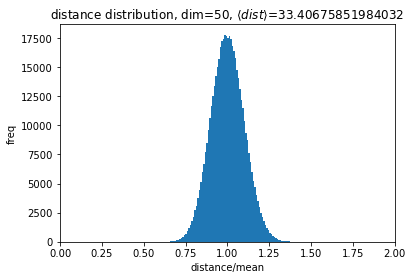

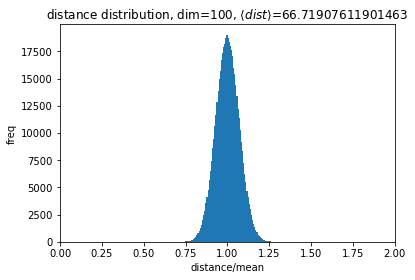

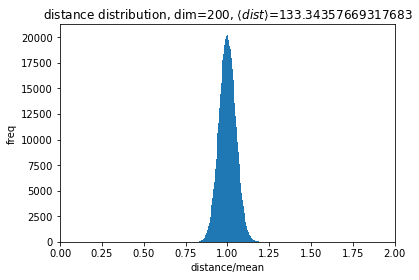

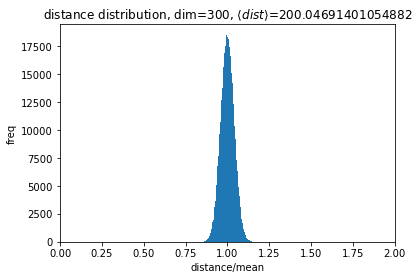

In [12]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib
import math

## parameters:
N=1000; # number of vectors, make it even
np.random.seed(3454)

## loop over dimension:
for d in [1,2,3,10,50,100,200,300]:
    ## setup a set of row vectors of uniformly distributed random
    ## numbers between -1 and 1 - each row of X is a vector:
    X=2*(np.random.random((N,d))-0.5);
    #Xnorm=np.zeros((N,1));
    #for i in range(0,N):
    #    Xnorm[i]=np.sqrt(np.dot(X[i,:],X[i,:]));
  
    i=0;
    distances=np.zeros((int(N*(N-1)/2),1));
    angles=np.zeros((int(N*(N-1)/2),1));
    for n in range(0,N):
        for m in range(0,(n-1)):
            #diff=X[n,:]-X[m,:]; 
            distances[i]=np.sum(np.abs(X[n,:]-X[m,:]));
            #angles[i]=np.arccos(np.dot(X[n,:],X[m,:])/(Xnorm[n]*Xnorm[m]));
            i=i+1;

    dist_mean=np.mean(distances[0:i]);
    distances=distances[0:i]/dist_mean;
    angle_mean=np.mean(angles[0:i])*180/math.pi;
    angles=angles[0:i]*180/math.pi;

    plt.figure(1); plt.clf();
    ## plot distribution of distances:
    #plt.subplot(2,1,1);
    counts1,edges1,patches1=plt.hist(distances,100);
    counts=counts1/sum(counts1);
    centers=(edges1[0:100]+edges1[1:101])/2;
    plt.bar(centers,counts);
    plt.xlim([0,2]);
    plt.title('distance distribution, dim='+repr(d)
              +', $\\langle{}dist\\rangle$='+repr(dist_mean))
    plt.xlabel('distance/mean');
    plt.ylabel('freq');
  
    #plt.subplot(2,1,2);
    ## plot distribution of angles:
    #counts2,edges2,pathches2=plt.hist(angles,100);
    #counts=counts/sum(counts);
    #centers2=(edges2[0:100]+edges2[1:101])/2;
    #plt.bar(centers2,counts2);
    #plt.xlim([0,180]);
    #plt.title('angle distribution, dim='+repr(d)
    #      +', $\\langle\\theta\\rangle$='+repr(angle_mean))
    #plt.xlabel('angle (degree)');
    #plt.ylabel('freq');

    #plt.tight_layout()
    plt.pause(0.05)
    #wait = input("Enter to continue...")

plt.show()

Looking at the above plot, we can see that the distribution of distances begins to converge towards one value as the dimension of the random vectors increases, similarly to the $L_2$ case shown in lecture. In fact, the value the distances begin to converge to is very close to the theoretical value of $\frac{2}{3}d$ where $d$ is the dimension.

### 2b

Think of each distance between two random vectors as an i.i.d. random sample of the differences between the elements of the vector, given by $|a_i-b_i|$, with sample size $d$. The distance between two vectors will be proportional to the average of this sample for large $d$. Given these two facts, we know from the central limit theorem that for suffiently large $d$, the distribution of the average differences (and therefore the distances, since they are proportional) will be gaussian variance $\sigma^2/\sqrt{d}$. Therefore, the distance between any two vectors will converge towards a single value as $d$ continues to grow.

### 3(i)

In [82]:
X = np.array([[2,8,1,2,9,4,3,8,2],[9,4,1,8,6,3,9,6,5]]).astype(float32)

NameError: name 'float32' is not defined

We are asked to perform step-by-step hierarchical clustering of the above set of two-dimensional points. Recall that this is the proccess of iteratively merging the cluster centroids such that you minimize a given metric, which in this case is the new cluster variance. Recall that rather than calculating the cluster variance for each possible new cluster, we can use the equation $\Delta Var = \frac{N_A\times N_B}{N_A+N_B}||\vec{\bar{x_A}}-\vec{\bar{x_B}}||^2$ to calculate the change in variance for each possible new cluster and pick the smallest one. We are also asked to plot circles of each clustering as the clustering proceeds. However, below I instead plot the changing labels of the points for each cluster and that cluster's centroid (contains the same information, just a little easier to plot without hand drawing). Doing this below...

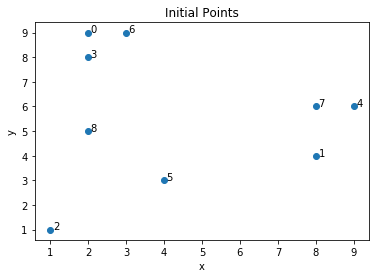

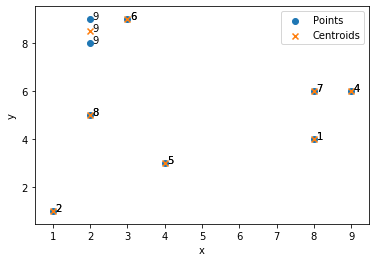

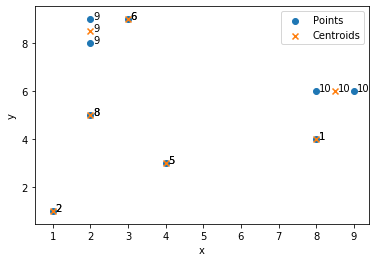

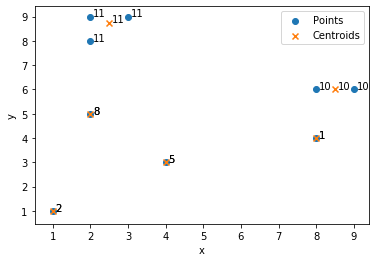

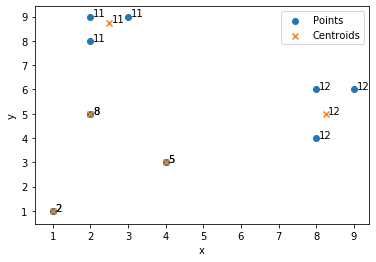

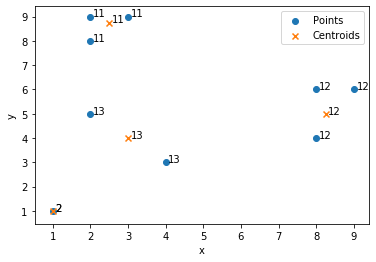

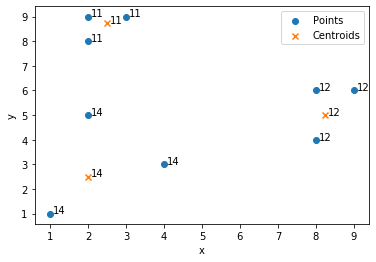

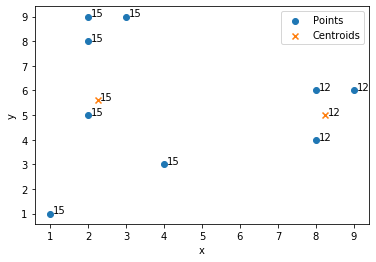

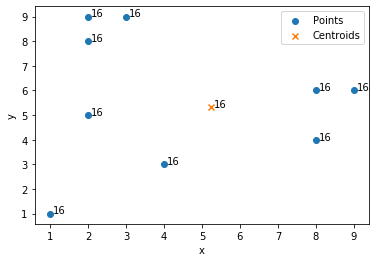

In [14]:
# Calculate the change in variance for combining two clusters
def calc_delta_var(centroid_1, n_1, centroid_2, n_2):
    delta_var = ((n_1*n_2)/(n_1+n_2))*np.square(np.linalg.norm(centroid_1-centroid_2))
    return delta_var

# Calculate the average of two centroids
def calc_cluster_centroid(old_centroid_1, old_centroid_2):
    new_centroid = (old_centroid_1+old_centroid_2)/2
    return new_centroid

# Get the number of points inside a specific cluster
def get_cluster_size(lbl, point_lbls):
    cluster_points = point_lbls[point_lbls==lbl]
    return cluster_points.shape[0]

# Perform one heirarchical clustering iteration
def iterate_clustering(clusters, point_lbls):
    
    # Iterate over each cluster pair
    lowest_delta_var = [np.inf, -1, -1] # [best delta var, best i, best j]
    for i, cluster_1 in enumerate(clusters):
        for j, cluster_2 in enumerate(clusters):
            if i == j: continue
            else:
                # Calculate the change in variance for each valid cluster combination
                n_1 = get_cluster_size(cluster_1[1], point_lbls) 
                n_2 = get_cluster_size(cluster_2[1], point_lbls)
                delta_var = calc_delta_var(cluster_1[0], n_1, cluster_2[0], n_2)
                if delta_var < lowest_delta_var[0]: 
                    lowest_delta_var = [delta_var, i, j]
    
    i, j = lowest_delta_var[1], lowest_delta_var[2]
    
    # Create new point labels
    new_lbl = np.max(point_lbls)+1
    old_lbls = [clusters[i][1], clusters[j][1]]
    point_lbls[point_lbls==old_lbls[0]] = new_lbl
    point_lbls[point_lbls==old_lbls[1]] = new_lbl
    
    # Create the new cluster
    new_cluster = (calc_cluster_centroid(clusters[i][0], clusters[j][0]), new_lbl)
    
    # Update cluster list
    for idx in sorted([i, j], reverse=True):
        del clusters[idx]
    clusters.append(new_cluster)
    
    # Get cluster centroids and labels for plotting
    cluster_centroids = np.array([cluster[0] for cluster in clusters])
    cluster_lbls = [cluster[1] for cluster in clusters]
    
    # Plot new cluster centroids and labeled points
    plt.figure()
    plt.clf()
    plt.scatter(X[0,:],X[1,:], label='Points')
    plt.scatter(cluster_centroids[:,0], cluster_centroids[:,1], marker='x',
               label='Centroids')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    for ii, lbl in enumerate(point_lbls):
        plt.text(X[0,ii]+0.07,X[1,ii],str(lbl))
        
    for ii, lbl in enumerate(cluster_lbls):
        plt.text(cluster_centroids[ii,0]+0.07,cluster_centroids[ii,1],str(lbl))
    
    return clusters, point_lbls
    
# Start by initializing each point as a cluster
init_clusters = [(X[:,i], i) for i in range(X.shape[1])]
init_point_lbls = np.array([i for i in range(X.shape[1])])

# Plot the initial set up
plt.figure()
plt.clf()
plt.scatter(X[0,:],X[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Initial Points")
for ii in range(0,np.size(X[0,:])):
    plt.text(X[0,ii]+0.07,X[1,ii],str(ii))

# Perform first clustering step
new_clusters, new_point_lbls = iterate_clustering(init_clusters, init_point_lbls)
# Perform second clustering step
new_clusters, new_point_lbls = iterate_clustering(new_clusters, new_point_lbls)
# Perform third clustering step
new_clusters, new_point_lbls = iterate_clustering(new_clusters, new_point_lbls)
# And so on until there is only one cluster...
for i in range(5):
    new_clusters, new_point_lbls = iterate_clustering(new_clusters, new_point_lbls)

### 3(ii)
Now we are asked to perform the same clustering task using the prebuilt scipy module and explain what each line of the code does. Doing this below...

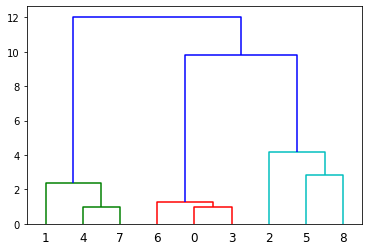

In [15]:
Y = pdist(X.T,'euclid') # Calculate all pairwise distances between points in X
distances = squareform(Y) # Put those distances into a square matrix
Z = linkage(Y,method='ward') # Cluster the points using the ward method
dendrogram(Z) # Plot a dendrogram of the clustering progression
k = 3
idx = fcluster(Z,k,'maxclust') # Get the cluster labels for each point with k clusters

### 3(iii)

In [16]:
print('Distances:\n', distances)
print('Z:\n', Z)
print('idx:\n', idx)

Distances:
 [[0.         7.81024968 8.06225775 1.         7.61577311 6.32455532
  1.         6.70820393 4.        ]
 [7.81024968 0.         7.61577311 7.21110255 2.23606798 4.12310563
  7.07106781 2.         6.08276253]
 [8.06225775 7.61577311 0.         7.07106781 9.43398113 3.60555128
  8.24621125 8.60232527 4.12310563]
 [1.         7.21110255 7.07106781 0.         7.28010989 5.38516481
  1.41421356 6.32455532 3.        ]
 [7.61577311 2.23606798 9.43398113 7.28010989 0.         5.83095189
  6.70820393 1.         7.07106781]
 [6.32455532 4.12310563 3.60555128 5.38516481 5.83095189 0.
  6.08276253 5.         2.82842712]
 [1.         7.07106781 8.24621125 1.41421356 6.70820393 6.08276253
  0.         5.83095189 4.12310563]
 [6.70820393 2.         8.60232527 6.32455532 1.         5.
  5.83095189 0.         6.08276253]
 [4.         6.08276253 4.12310563 3.         7.07106781 2.82842712
  4.12310563 6.08276253 0.        ]]
Z:
 [[ 0.          3.          1.          2.        ]
 [ 4.       

We are asked to explain the meaning of the above variables. `distances` is a square matrix of the pairwise euclidean distances between each pair of points. `Z` is an $(n-1)\times 4$ matrix, where the first and second entries of each row represent the clusters merged on the $i^{th}$ iteration of clustering. The third entry of each row represents the ward distance between the two clusters that were merged, and the final entry represents the number of points in the new cluster. Finally, `idx` represents the cluster labels of the original points when we take `k` clusters.

### 4a

We are asked to find the clusteroids for k-means clustering with k=2,3,4 starting with the initial clusteroid at the fifth data point. To do this, we iteratively assign clusteroids to the points in the dataset that are the furthest from each other clusteroid. Doing this below...

In [39]:
# Initialize point 5 as the first centroid
init_centroids = X.T[4,:].reshape(1,2)

# Calculate all of the pairwise distances
Y = cdist(init_centroids, X.T)

# Pick the largest distance, add it to centroids
init_centroids = np.vstack((init_centroids, X.T[np.argmax(Y),:]))

# Calculate all of the new pairwise distances and find the minimum distance for each
# point to the centroids
Y = np.amin(cdist(init_centroids, X.T), axis=0)

# Pick the one with the largest minimum and add it to the centroids
init_centroids = np.vstack((init_centroids, X.T[np.argmax(Y),:]))

# Calculate all of the new pairwise distances and find the minimum distance for each
# point to the centroids
Y = np.amin(cdist(init_centroids, X.T), axis=0)

# Pick the one with the largest minimum and add it to the centroids
init_centroids = np.vstack((init_centroids, X.T[np.argmax(Y),:]))

print("K-means initial clusteroids:\n", init_centroids)

K-means initial clusteroids:
 [[9 6]
 [1 1]
 [2 9]
 [2 5]]


Looking at the above output, we would keep the first (top) two points for k=2, the first three for k=3, and the first four for k=4.

### 4b

Now we are asked to to perform clustering on the data using k-means for k=3. To do this, we start by assigning the initial clusteroids to be the first three of the ones we found above. Then, we will iterate on the following steps:
* assign each point to a clusteroid according to which clusteroid it is closest to
* calculate the new centroids to be the center of mass of all points assigned to them

We will coninue to iterate on this proccess until the point labels no longer change. Doing this below...

In [81]:
def calc_avg_point(point_lbls, lbl):
    idxs = np.where(point_lbls==lbl)[0]
    print(X.T[idxs,:])
    mean_point = np.mean(X.T[idxs,:], axis=0)
    print(mean_point)
    return mean_point

k=3
centroids = init_centroids[0:3,:]
old_point_lbls = -1*np.ones(9)

while True:
    print("iteration")
    Y = cdist(centroids, X.T)
    new_point_lbls = np.argmin(Y, axis=0)
    for i in range(k):
        centroids[i,:] = calc_avg_point(new_point_lbls, i)
        print(centroids[i,:])
        
    if np.array_equal(old_point_lbls,new_point_lbls): break
    else: old_point_lbls = np.copy(new_point_lbls)
    

iteration
[[8 4]
 [9 6]
 [8 6]]
[8.33333333 5.33333333]


TypeError: only size-1 arrays can be converted to Python scalars

In [79]:
centroids

array([[8, 5],
       [2, 2],
       [2, 7]])

In [70]:
print(new_point_lbls)

[2 0 1 2 0 1 2 0 2]


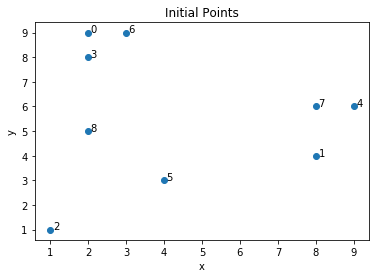

In [71]:
# Plot the initial set up
plt.figure()
plt.clf()
plt.scatter(X[0,:],X[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Initial Points")
for ii in range(0,np.size(X[0,:])):
    plt.text(X[0,ii]+0.07,X[1,ii],str(ii))

In [67]:
X.T

array([[2, 9],
       [8, 4],
       [1, 1],
       [2, 8],
       [9, 6],
       [4, 3],
       [3, 9],
       [8, 6],
       [2, 5]])